In [1]:
# 텐서프롤에 내장된 MNNIST 데이터셋 불러오기
import tensorflow as tf
mnist = tf.keras.datasets.mnist
# x_train: 학습할 28*28크기의 영상
# y_train: 데이터의 정답 라벨
# x_test: 검증에 쓰일 영상
# y_test: 검증영상에 대한 라벨
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# 255로 나누어 0.0~1.0 사이의 값으로 정규화 수행
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# 은닉 계층: RELU, 출력함수: sotfmax 계층 생성
# 128개의 노드를 가지는 은닉 RELU 1계층과 softmax 활성함수를 가지는 10개의 노드 출력층
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten: 2차원 -> 1차원으로 변형
  tf.keras.layers.Dense(128, activation='relu'),# 계층의 개수 변경, relu대신 다른 함수 사용
  tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 5번 학습 수행
model.fit(x_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8761 - loss: 0.4340
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9653 - loss: 0.1214
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0800
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0588
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0458


In [5]:
# 테스트에 대해서 오차 계산
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9755 - loss: 0.0813


[0.0813426822423935, 0.9754999876022339]

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [7]:
import numpy as np

samples=np.random.choice(x_test.shape[0])

x_predict=x_test[samples,:,:]
y_predict=y_test[samples]

x_predict=np.expand_dims(x_predict, axis = 0)

result=model.predict(x_predict)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[2.9556495e-13 4.2291147e-17 9.9999988e-01 3.2579651e-11 1.4441272e-13
  5.5256433e-16 1.1746720e-07 6.0119477e-19 1.6919864e-12 1.1936682e-18]]


In [8]:
# 숫자 2에 가깝다
np.argmax(result, axis=1)

array([2], dtype=int64)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
# 결과를 그래픽으로 보여줄 메서드 정의
def showImage(imgs, labels):
    n=len(imgs)
    f=plt.figure()
    f.gca().set_axis_off()
    plt.margins(0, 0)
    for i in range(n):
        if(not np.any(imgs[i])):
            continue
        if(n<4):
            f.add_subplot(1,n,i+1)
        else:
            g_w=int(np.math.ceil(n/2))
            f.add_subplot(2,g_w,i+1)
        f.gca().xaxis.set_major_locator(plt.NullLocator())
        f.gca().yaxis.set_major_locator(plt.NullLocator())
        img=imgs[i].copy()
        img=(img*255).astype(np.uint8)
        plt.imshow(img, cmap='gray',vmin=0, vmax=255, interpolation='none')
        ax=plt.gca()
        ax.set_xlabel(labels[i],fontsize=20)
    plt.tight_layout(pad=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_2036\1315934360.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  g_w=int(np.math.ceil(n/2))


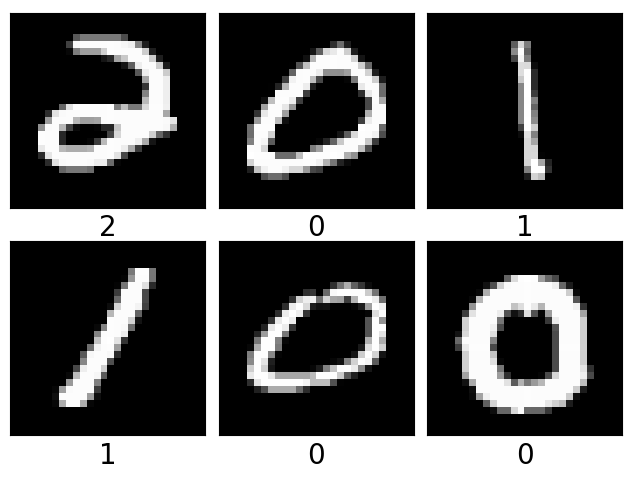

In [13]:
samples=np.random.choice(x_test.shape[0],6)
x_predict=x_test[samples,:,:]
y_predict=y_test[samples]
result=model.predict(x_predict)
preds=np.argmax(result, axis=1)
showImage(x_predict, preds)

model.save('mnist_mlp.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_2036\1315934360.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  g_w=int(np.math.ceil(n/2))


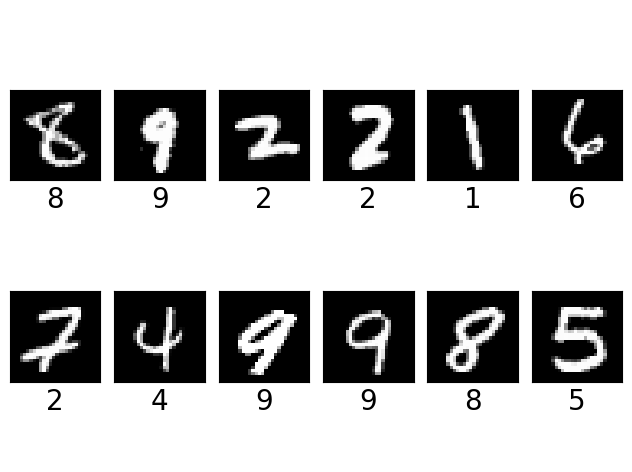

In [14]:
samples=np.random.choice(x_test.shape[0],12)
x_predict=x_test[samples,:,:]
y_predict=y_test[samples]
result=model.predict(x_predict)
preds=np.argmax(result, axis=1)
showImage(x_predict, preds)

model.save('mnist_mlp.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


C:\Users\user\AppData\Local\Temp\ipykernel_2036\1315934360.py:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  g_w=int(np.math.ceil(n/2))


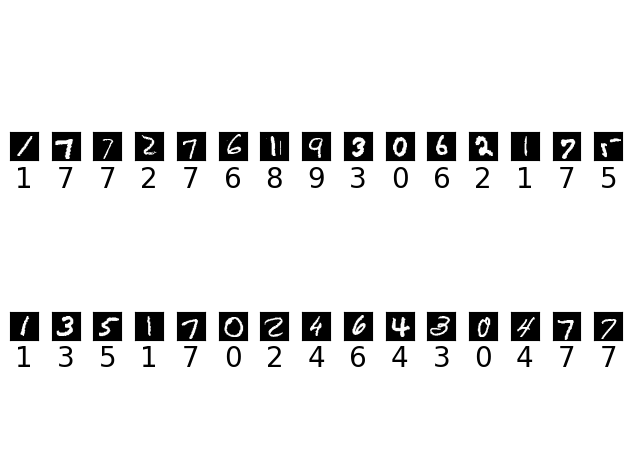

In [15]:
samples=np.random.choice(x_test.shape[0],30)
x_predict=x_test[samples,:,:]
y_predict=y_test[samples]
result=model.predict(x_predict)
preds=np.argmax(result, axis=1)
showImage(x_predict, preds)

model.save('mnist_mlp.h5')